# Data preparation

In [1]:
import music21 as m
import numpy as np

Music21 provides the data from various componists (mostly Bach) in their dataformat.

In [2]:
bach = m.corpus.search('bach')

In [3]:
corpus = []
for b in bach:
    corpus.append(b.parse())

In [4]:
len(corpus)

564

Keep only the pieces with four voices.

In [5]:
clean_corpus = []
for piece in corpus:
    if len(piece.parts) == 4:
        clean_corpus.append(piece)
len(clean_corpus)

368

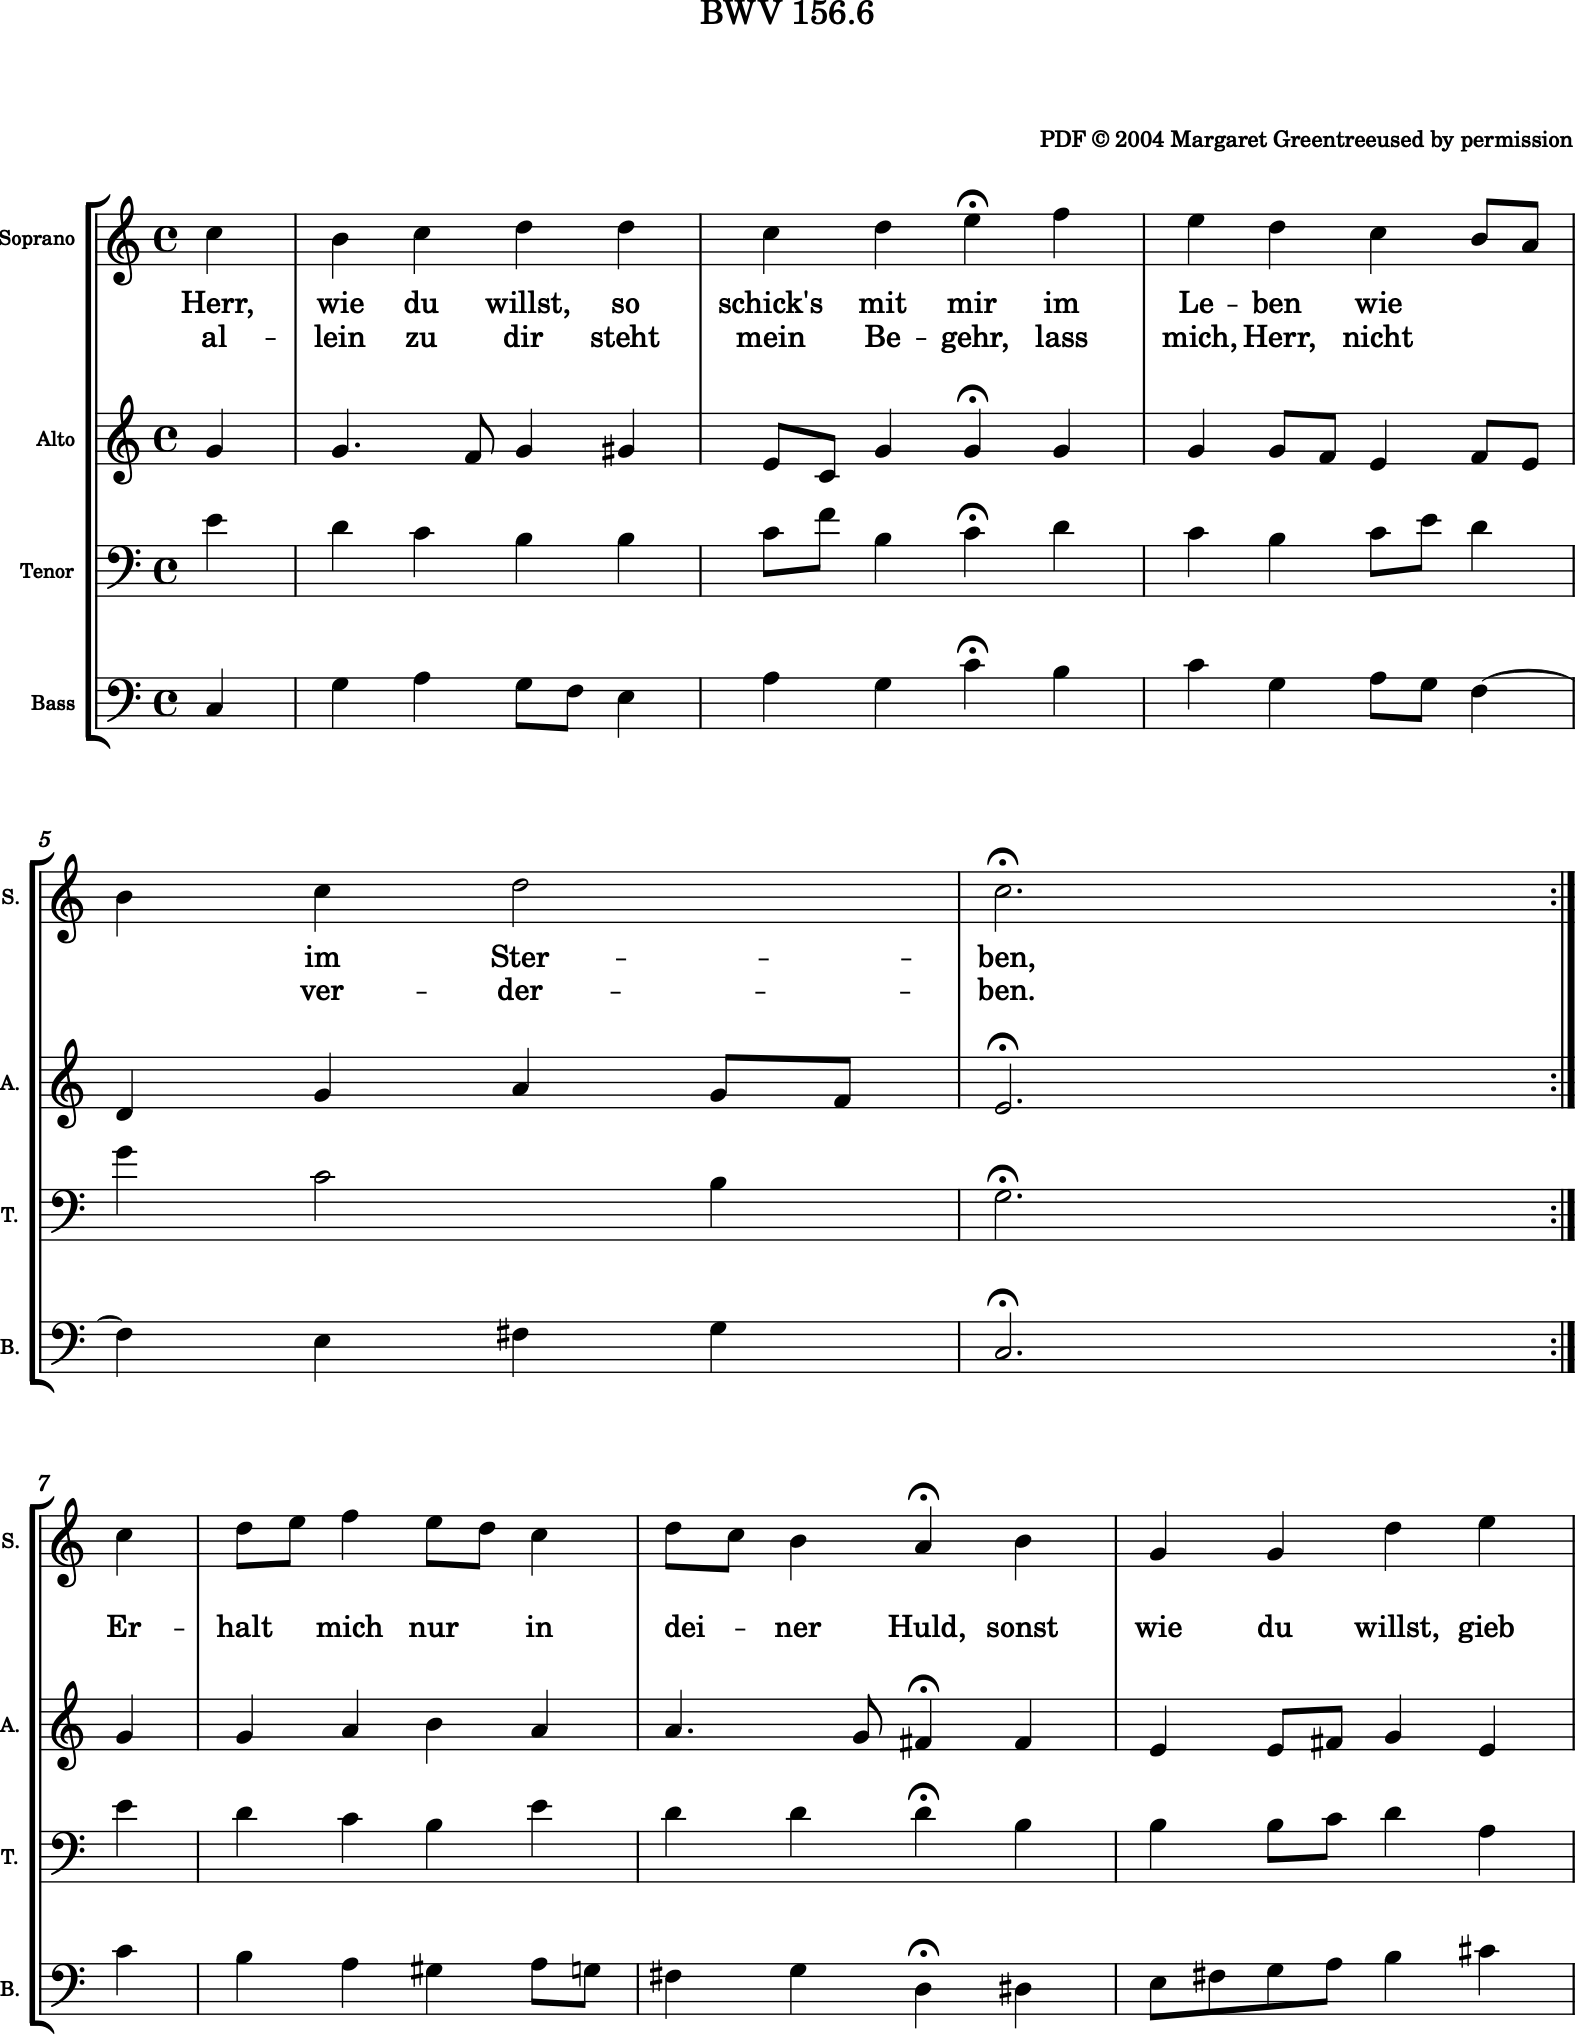

In [9]:
clean_corpus[42].show()

In [7]:
clean_corpus[42].show("text")

{0.0} <music21.text.TextBox 'PDF © 2004...'>
{0.0} <music21.text.TextBox 'BWV 156.6'>
{0.0} <music21.metadata.Metadata object at 0x179a65f10>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument 'P1: Soprano: '>
    {0.0} <music21.stream.Measure 0 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of C major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note C>
    {1.0} <music21.stream.Measure 1 offset=1.0>
        {0.0} <music21.note.Note B>
        {1.0} <music21.note.Note C>
        {2.0} <music21.note.Note D>
        {3.0} <music21.note.Note D>
    {5.0} <music21.stream.Measure 2 offset=5.0>
        {0.0} <music21.note.Note C>
        {1.0} <music21.note.Note D>
        {2.0} <music21.note.Note E>
        {3.0} <music21.note.Note F>
    {9.0} <music21.stream.Measure 3 offset=9.0>
        {0.0} <music21.note.Note E>
        {1.0} <music21.note.Note D>
 

In [35]:
key = clean_corpus[0].parts[0].flat.getElementsByClass(m.key.Key)[0]
key

<music21.key.Key of g minor>

In [33]:
for k in key:
    print(k)

g minor


In [ ]:
encoded_song = []
for part in song.parts:
    encoded_part = []
    for event in part.flat.notesAndRests:            
        steps = ["_"] * (int(event.duration.quarterLength / time_step) - 1)
        if isinstance(event, m21.note.Note):
            symbol = event.pitch.midi
        if isinstance(event, m21.note.Rest):
            symbol = "r"
        
        encoded_part.extend(list(symbol).append(steps))

### IDEA:

Seperate all the tracks and consider the flow of notes (= pitch + duration) independently. The connection between the voices is granted by the chords. In a 4 voices chorale for example like above the first note in the sopran is the tupel ("d5", 1.5, g minor).

Chords are here given by a set of pitches. Since the length of the chords can be different, we extract the root and the bass note and the name.


In [42]:
import json

In [31]:
def get_root(chord):
    return chord.root().name

def get_bass(chord):
    return chord.bass().name

def get_name(chord):
    return chord.commonName

Clean the corpus from everything with more than 4 voices.

In [40]:
choral_chords_dict = {}
for i, choral in enumerate(clean_corpus):
    chords = choral.chordify()
    chord_dict = {}
    for chord in chords.flatten().getElementsByClass('Chord'):
        chord_dict[chord.offset] = [get_root(chord), get_bass(chord), get_name(chord)]
    choral_chords_dict[i] = chord_dict

In [44]:
with open("choral_chords.json", "w") as f:
    json.dump(choral_chords_dict, f)

In [82]:
with open('choral_chords.json') as json_file:
    choral_chords_dict = json.load(json_file)

In [158]:
choral_chords_dict

{'0': {'0.0': ['G', 'G', 'minor triad'],
  '2.0': ['F', 'A', 'major triad'],
  '4.0': ['B-', 'B-', 'major triad'],
  '5.0': ['D', 'A', 'dominant seventh chord'],
  '6.0': ['G', 'G', 'minor triad'],
  '7.0': ['D', 'F#', 'major triad'],
  '8.0': ['E-', 'G', 'major triad'],
  '9.0': ['F', 'A', 'dominant seventh chord'],
  '10.0': ['B-', 'B-', 'major-second major tetrachord'],
  '11.0': ['G', 'G', 'minor triad'],
  '12.0': ['C', 'E-', 'minor seventh chord'],
  '13.0': ['C', 'C', 'incomplete dominant-seventh chord'],
  '14.0': ['F', 'F', 'major triad'],
  '16.0': ['B-', 'B-', 'major triad'],
  '20.0': ['B-', 'B-', 'major triad'],
  '22.0': ['B-', 'D', 'major triad'],
  '24.0': ['F', 'F', 'major triad'],
  '25.0': ['F', 'A', 'major triad'],
  '26.0': ['C', 'G', 'minor triad'],
  '27.0': ['C', 'E-', 'minor triad'],
  '28.0': ['G', 'D', 'minor triad'],
  '29.0': ['G', 'C', 'perfect-fourth minor tetrachord'],
  '30.0': ['D', 'D', 'major triad'],
  '31.0': ['D', 'D', 'dominant seventh chord'],
 

In [186]:
data_dict = {}
voice = ["sopran", "alt", "tenor", "bass"]

for num, choral in enumerate(clean_corpus):
    voices_dict = {}
    for i, track in enumerate(choral.parts):
        track_dict = {}
        for s in track.flatten().notesAndRests:
            try:
                chord_info = choral_chords_dict[str(num)][str(s.offset)]
                track_dict[s.offset] = [i, str(s.pitch), s.quarterLength]    # voice, pitch, duration
            except AttributeError:
                track_dict[s.offset] = [i, "", s.quarterLength]    # This is a rest
            except KeyError:
                chord_info = ["", "", "no chord"]
                track_dict[s.offset] = [i, "", s.quarterLength]
            track_dict[s.offset].extend(chord_info)
        voices_dict[voice[i]] = track_dict
    data_dict[num] = voices_dict
    

In [188]:
data_dict[15]

{'sopran': {0.0: [0, 'G4', 2.0, 'E', 'E', 'minor triad'],
  2.0: [0, 'A4', 2.0, 'F', 'F', 'incomplete major-seventh chord'],
  4.0: [0, 'C5', 2.0, 'D', 'F#', 'dominant seventh chord'],
  6.0: [0, 'B4', 2.0, 'G', 'G', 'major-second major tetrachord'],
  8.0: [0, 'A4', 2.0, 'G', 'G', 'quartal trichord'],
  10.0: [0, 'C5', 2.0, 'C', 'E', 'major triad'],
  12.0: [0, 'A4', 2.0, 'D', 'D', 'major triad'],
  14.0: [0, 'G4', 2.0, 'G', 'G', 'major triad'],
  16.0: [0, 'D5', 2.0, 'G', 'G', 'major triad'],
  18.0: [0, 'D5', 2.0, 'D', 'F#', 'major triad'],
  20.0: [0, 'D5', 2.0, 'B', 'F', 'half-diminished seventh chord'],
  22.0: [0, 'E5', 3.0, 'E', 'E', 'major triad'],
  25.0: [0, 'C5', 1.0, 'A', 'A', 'minor triad'],
  26.0: [0, 'D5', 2.0, 'D', 'D', 'minor triad'],
  28.0: [0, 'C5', 2.0, 'D#', 'D#', 'diminished seventh chord'],
  30.0: [0, 'B4', 2.0, 'E', 'E', 'major triad'],
  32.0: [0, '', 2.0, '', '', 'no chord'],
  34.0: [0, '', 2.0, '', '', 'no chord'],
  36.0: [0, 'C5', 2.0, 'A', 'A', 'minor

In [189]:
with open("bach_data.json", "w") as f:
    json.dump(data_dict, f)

In [190]:
with open('bach_data.json') as json_file:
    data_dict = json.load(json_file)

In [191]:
chord_encoder = {"no chord":0}
pitch_encoder = {"": 0}
notename_encoder = {"":0}

In [192]:
data_dict["0"]

{'sopran': {'0.0': [0, 'D5', 2.0, 'G', 'G', 'minor triad'],
  '2.0': [0, 'F5', 2.0, 'F', 'A', 'major triad'],
  '4.0': [0, 'D5', 1.0, 'B-', 'B-', 'major triad'],
  '5.0': [0, 'D5', 1.0, 'D', 'A', 'dominant seventh chord'],
  '6.0': [0, 'D5', 1.0, 'G', 'G', 'minor triad'],
  '7.0': [0, 'D5', 1.0, 'D', 'F#', 'major triad'],
  '8.0': [0, 'E-5', 2.0, 'E-', 'G', 'major triad'],
  '10.0': [0, 'D5', 2.0, 'B-', 'B-', 'major-second major tetrachord'],
  '12.0': [0, 'C5', 2.0, 'C', 'E-', 'minor seventh chord'],
  '14.0': [0, 'C5', 2.0, 'F', 'F', 'major triad'],
  '16.0': [0, 'B-4', 4.0, 'B-', 'B-', 'major triad'],
  '20.0': [0, 'D5', 2.0, 'B-', 'B-', 'major triad'],
  '22.0': [0, 'F5', 2.0, 'B-', 'D', 'major triad'],
  '24.0': [0, 'C5', 1.0, 'F', 'F', 'major triad'],
  '25.0': [0, 'C5', 1.0, 'F', 'A', 'major triad'],
  '26.0': [0, 'C5', 1.0, 'C', 'G', 'minor triad'],
  '27.0': [0, 'G4', 1.0, 'C', 'E-', 'minor triad'],
  '28.0': [0, 'B-4', 2.0, 'G', 'D', 'minor triad'],
  '30.0': [0, 'A4', 2.0, '

In [193]:
voice

['sopran', 'alt', 'tenor', 'bass']

In [195]:
for choral in data_dict:
    for voice in data_dict[choral]:
        for step in data_dict[choral][voice]:
            pitch = data_dict[choral][voice][step][1]
            root  = data_dict[choral][voice][step][3]
            bass  = data_dict[choral][voice][step][4]
            chord = data_dict[choral][voice][step][5]
            data_dict[choral][voice][step][1] = pitch_encoder.setdefault(pitch, len(pitch_encoder))
            data_dict[choral][voice][step][3] = notename_encoder.setdefault(root, len(notename_encoder))
            data_dict[choral][voice][step][4] = notename_encoder.setdefault(bass, len(notename_encoder))
            data_dict[choral][voice][step][5] = chord_encoder.setdefault(chord, len(chord_encoder))

In [196]:
chord_decoder = {y: x for x, y in chord_encoder.items()}
pitch_decoder = {y: x for x, y in pitch_encoder.items()}
notename_decoder = {y: x for x, y in notename_encoder.items()}

In [197]:
data_dict["0"]

{'sopran': {'0.0': [0, 1, 2.0, 1, 1, 1],
  '2.0': [0, 2, 2.0, 2, 3, 2],
  '4.0': [0, 1, 1.0, 4, 4, 2],
  '5.0': [0, 1, 1.0, 5, 3, 3],
  '6.0': [0, 1, 1.0, 1, 1, 1],
  '7.0': [0, 1, 1.0, 5, 6, 2],
  '8.0': [0, 3, 2.0, 7, 1, 2],
  '10.0': [0, 1, 2.0, 4, 4, 4],
  '12.0': [0, 4, 2.0, 8, 7, 5],
  '14.0': [0, 4, 2.0, 2, 2, 2],
  '16.0': [0, 5, 4.0, 4, 4, 2],
  '20.0': [0, 1, 2.0, 4, 4, 2],
  '22.0': [0, 2, 2.0, 4, 5, 2],
  '24.0': [0, 4, 1.0, 2, 2, 2],
  '25.0': [0, 4, 1.0, 2, 3, 2],
  '26.0': [0, 4, 1.0, 8, 1, 1],
  '27.0': [0, 6, 1.0, 8, 7, 1],
  '28.0': [0, 5, 2.0, 1, 5, 1],
  '30.0': [0, 7, 2.0, 5, 5, 2],
  '32.0': [0, 6, 4.0, 1, 1, 1],
  '36.0': [0, 1, 2.0, 1, 1, 1],
  '38.0': [0, 2, 2.0, 2, 2, 2],
  '40.0': [0, 1, 1.0, 4, 4, 2],
  '41.0': [0, 1, 1.0, 5, 8, 6],
  '42.0': [0, 1, 1.0, 4, 4, 2],
  '43.0': [0, 1, 1.0, 5, 3, 2],
  '44.0': [0, 3, 2.0, 7, 4, 7],
  '46.0': [0, 1, 2.0, 4, 2, 2],
  '48.0': [0, 4, 2.0, 8, 7, 5],
  '50.0': [0, 4, 2.0, 4, 2, 8],
  '52.0': [0, 5, 4.0, 4, 4, 2],
  '56

In [244]:
chord_decoder

{0: 'no chord',
 1: 'minor triad',
 2: 'major triad',
 3: 'dominant seventh chord',
 4: 'major-second major tetrachord',
 5: 'minor seventh chord',
 6: 'incomplete minor-seventh chord',
 7: 'major seventh chord',
 8: 'quartal trichord',
 9: 'Major Seventeenth',
 10: 'Minor Third with octave doublings',
 11: 'quartal tetramirror',
 12: 'incomplete dominant-seventh chord',
 13: 'diminished triad',
 14: 'major-second minor tetrachord',
 15: 'whole-tone trichord',
 16: 'incomplete major-seventh chord',
 17: 'perfect-fourth minor tetrachord',
 18: 'Major Sixteenth',
 19: 'perfect-fourth diminished tetrachord',
 20: 'minor-augmented tetrachord',
 21: 'perfect-fourth major tetrachord',
 22: 'tritone quartal tetrachord',
 23: 'Major Third with octave doublings',
 24: 'half-diminished seventh chord',
 25: 'augmented triad',
 26: 'major-minor tetramirror',
 27: 'Perfect Fourth with octave doublings',
 28: 'major-third diminished tetrachord',
 29: 'minor trichord',
 30: 'augmented major tetrachor

In [225]:
sequence_length = 10
input_sequences = []
outputs = []

for piece in data_dict:
    for voice in data_dict[piece]:
        sorted_values = np.array([data_dict[piece][voice][str(key)] for key in sorted(map(float, data_dict[piece][voice].keys()))])
        sequence = [sorted_values[i:i+sequence_length] for i in range(len(sorted_values) - sequence_length)]
        output = [sorted_values[i+sequence_length] for i in range(len(sorted_values) - sequence_length)]
        input_sequences.extend(sequence)
        outputs.extend(output)


In [232]:
assert(len(outputs)==len(input_sequences))

In [237]:
X = np.array(input_sequences)
y = np.array(outputs)

In [236]:
X.shape

(72337, 10, 6)

In [238]:
y.shape

(72337, 6)

In [239]:
with open('input.npy', 'wb') as f:
    np.save(f, X)
with open('output.npy', 'wb') as f:
    np.save(f, y)

In [6]:
example_output = """C4 G3 E3 C3
_ _ _ _
_ _ _ B2
_ _ _ _
C4 C4 E3 A2
_ _ _ _
_ _ C3 _
_ _ _ _
D4 C4 G3 G2
_ _ _ _
_ B3 _ _
_ _ _ _
E4 C4 G3 C3
_ _ _ _
_ _ E3 _
_ _ _ _
F4 C4 A3 A2
_ _ _ _
_ _ _ _
_ _ _ _
_ B3 D3 G2
_ _ _ _
_ _ G3 _
_ _ _ _
E4 C4 G3 C2
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
D4 B3 G3 G2
_ _ _ _
_ _ _ _
_ _ _ _
E4 C#4 G3 F2
_ _ _ _
_ _ _ E2
_ _ _ _
F4 D4 A3 D2
_ _ _ _
_ _ _ E2
_ _ _ _
F4 D4 A3 F2
_ _ _ _
_ _ _ G2
_ _ _ _
E4 D4 A3 A2
_ _ _ _
_ _ _ _
_ _ _ _
_ C#4 _ _
_ _ _ _
_ _ _ _
_ _ _ _
D4 D4 A3 F#2
_ _ _ _
_ _ _ _
_ _ _ _
D4 B3 G3 G2
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
_ _ _ _
C4 A3 E3 A2
_ _ _ _"""

In [7]:
example_output

'C4 G3 E3 C3\n_ _ _ _\n_ _ _ B2\n_ _ _ _\nC4 C4 E3 A2\n_ _ _ _\n_ _ C3 _\n_ _ _ _\nD4 C4 G3 G2\n_ _ _ _\n_ B3 _ _\n_ _ _ _\nE4 C4 G3 C3\n_ _ _ _\n_ _ E3 _\n_ _ _ _\nF4 C4 A3 A2\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ B3 D3 G2\n_ _ _ _\n_ _ G3 _\n_ _ _ _\nE4 C4 G3 C2\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\nD4 B3 G3 G2\n_ _ _ _\n_ _ _ _\n_ _ _ _\nE4 C#4 G3 F2\n_ _ _ _\n_ _ _ E2\n_ _ _ _\nF4 D4 A3 D2\n_ _ _ _\n_ _ _ E2\n_ _ _ _\nF4 D4 A3 F2\n_ _ _ _\n_ _ _ G2\n_ _ _ _\nE4 D4 A3 A2\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ C#4 _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\nD4 D4 A3 F#2\n_ _ _ _\n_ _ _ _\n_ _ _ _\nD4 B3 G3 G2\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\n_ _ _ _\nC4 A3 E3 A2\n_ _ _ _'

In [9]:
import numpy as np

In [24]:
melody = example_output
test = np.array([m.split() for m in melody.split("\n")]).T.tolist()

In [21]:
melody = np.array(test).T.tolist()

In [28]:
import music21 as m21

In [29]:
stream = m21.stream.Stream()

In [30]:
parts = [m21.stream.Part(id="Sopran"), m21.stream.Part(id="Alt"),
         m21.stream.Part(id="Tenor"), m21.stream.Part(id="Bass") ]